# Домашняя работа №2

In [48]:
import pandas as pd
from scipy import stats as sts
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

In [ ]:
#выборка - случайно выбранный набор величин из генеральной совокупности

- Если размер выборки больше 200, то такая выборка является репрезентативной?

In [ ]:
'''если такая выборка стратифицированная (случайный выбор из подгрупп ген совокупности), 
то можно считать ее репрезентативной. Важно, чтобы при этом каждый элемент выборки имел одинаковую вероятность 
быть отобранным'''

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

In [ ]:
"""1 - длина волос всех футболистов на ЧМ-2018
2 - длина волос французских футболистов на каждом чемпионате мира
3 - длина волос футболистов, участвовавших в матчах за последние 5 лет"""

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

In [ ]:
#способ 1 - вес каждого ребенка может попасть в случайную выборку 1 и более раз, способ 2 - не более одного раза

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


Text(0.5,0,'$x$')

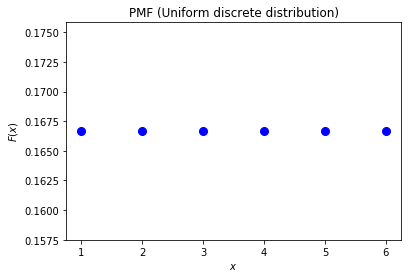

In [45]:
#у равномерного распределения отсутствует мода, так как все значения одинаковы  (на примере шестигранного кубика)
low, high = 1, 6
fig, ax = plt.subplots(1, 1)
x = np.arange(low,high+1)
ax.plot(x, sts.randint.pmf(x, low, high+1), 'bo', ms=8, label='randint pmf')
plt.title("PMF (Uniform discrete distribution)")
plt.ylabel('$p(x)$')
plt.xlabel('$x$')

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [58]:
import random
gamma_rv = sts.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

#заменяет значение случайного элемента выборки на аномальное
overshoot = 40
overshoot_num = random.choice(range(0,51))
sample[overshoot_num] = overshoot
new_med = sorted(sample)[24]
new_mean = sample.mean()


print('медиана с выбросом: {}, без выброса: {}, матожидание с выбросом: {}, без выброса: {}'.format(med, new_med, mean, new_mean))
#наиболее неустойчивая статистика - матожидание

медиана с выбросом: 2.600540408211372, без выброса: 2.666281251229087, матожидание с выбросом: 3.4178312903179244, без выброса: 4.16090010214084


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [63]:
pois_rv = sts.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
withc_sample = np.insert(sample,0,C)
multc_sample = np.array([i*C for i in sample])
mean_with_c = withc_sample.mean()
mean_mult_c = multc_sample.mean()

print('Матожидание: {}, с добавлением константы: {}, с умножением на константу: {}'.format(mean, mean_with_c, mean_mult_c))

Матожидание: 2.06, с добавлением константы: 2.0396039603960396, с умножением на константу: 1.03


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [66]:
exp_rv = sts.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = sample.mean()+10
sample_with_overshoot = np.insert(sample,0,overshoot)
new_var = sample_with_overshoot.var()
print('Дисперсия без выброса: {}, дисперсия с выбросом: {}'.format(var, new_var))

Дисперсия без выброса: 0.9132742646802374, дисперсия с выбросом: 2.8177044886330664


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [105]:
import math
norm_rv = sts.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here
q25, q75 = np.percentile(sample, [25,75])

iqr = q75 - q25

custom_range = sample.var()*2
print('Интерквантильный размах: {}, указанный промежуток: {}'.format(iqr, custom_range))

Интерквантильный размах: 1.3913038830158442, указанный промежуток: 1.9868912024436094


## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [79]:
beta_rv = sts.beta(1,3)
#your code here
mean = beta_rv.rvs(100).mean()
var = beta_rv.rvs(100).var()
med = beta_rv.rvs(100)[49]
mean, var, med

(0.2559529193817489, 0.03994519952716737, 0.05761622616598652)

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [77]:
gamma_rv = sts.gamma(2,2)

#your code here
mean = gamma_rv.rvs(100).mean()
var = gamma_rv.rvs(100).var()
med = gamma_rv.rvs(100)[49]
mean, var, med

(3.9801380939416937, 1.7693166269635576, 2.898491290905171)

- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

Text(0.5,0,'$x$')

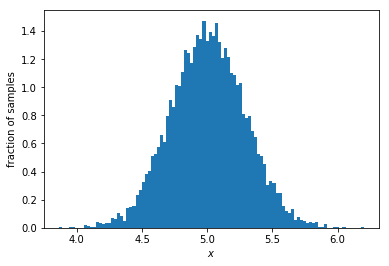

In [94]:
#распределение средних выборочных имеет нормальное распределение
norm_rv = sts.norm(5,2)

п
pmf = np.array(dist)
plt.hist(pmf, bins=100, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

Text(0.5,0,'$x$')

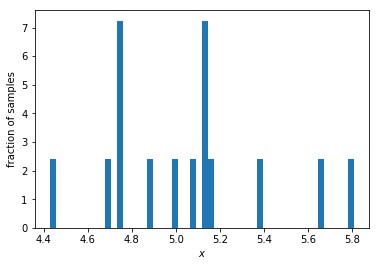

In [99]:
#ЦПТ не будет выполняться при небольшом количестве выборочных средних
norm_rv = sts.norm(5,2)

dist = []
for i in range(15):
    sample = norm_rv.rvs(50)
    x_ = sample.mean()
    dist.append(x_)
pmf = np.array(dist)
plt.hist(pmf, bins=50, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [ ]:
expon_rv = stats.expon(3)

new_rv = #your code here

## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [151]:
df = 10 #degrees of freedom
#print('Left bound: {}, Right bound: {}'.format(sts.chi2.ppf(0.025, df), sts.chi2.ppf(0.975, df)))

chi2 = sts.chi2(df)
dist = []
for i in range(10000):
    sample = chi2.rvs(50)
    x_ = sample.mean()
    dist.append(x_)
np_dist = np.array(dist)
mean = np_dist.mean()
var = np_dist.var()
se = math.sqrt(var / len(np_dist))
print('Left bound:{}, Right bound:{}'.format(mean-1.645*se, mean+1.645*se))

Left bound:9.992321380248294, Right bound:10.013024553046096


- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [131]:
df = 15
print('95% Left bound: {}, Right bound: {}'.format(sts.t.ppf(0.025, df), sts.t.ppf(0.975, df)))
print('90% Left bound: {}, Right bound: {}'.format(sts.t.ppf(0.05, df), sts.t.ppf(0.95, df)))

95% Left bound: -2.131449545559323, Right bound: 2.131449545559323
90% Left bound: -1.7530503556925552, Right bound: 1.7530503556925547


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [138]:
norm_rv = sts.norm(0, 2)
for size in [50,100]:
    sample = norm_rv.rvs(size)
    mean = sample.mean()
    var = sample.var()
    se = var / math.sqrt(len(sample))
    print('confidence int for',size,'Left bound: {}, Right bound: {}'.format(mean-1.645*se, mean+1.645*se),'length of CI',2*1.645*se)
#интервалы разные по ширине, хотя уровень доверия остается прежним (чем меньше выборка, тем больше ДИ)


confidence int for 50 Left bound: -0.6228562895619892, Right bound: 0.7945061307887541 length of CI 1.4173624203507433
confidence int for 100 Left bound: -0.8111457575068795, Right bound: 0.21598598061564106 length of CI 1.0271317381225205


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#допустили ошибку второго рода, так как вынуждены принять ложную гипотезу

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


In [ ]:
'''
1 - неверно
2 - не обязательно верна. Нам стоит как минимум не отвергать ее
3 - неверно'''

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#использовать уровень доверия 99%, то есть, 0.01. Вопрос 2 - ?

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

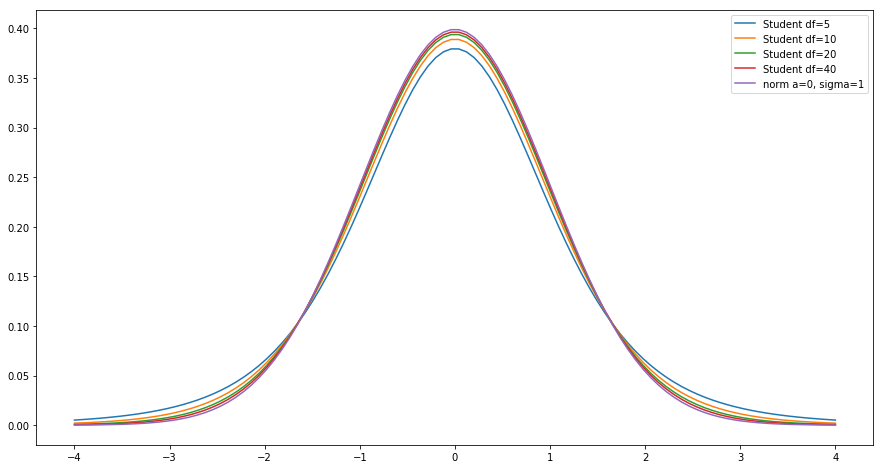

In [150]:
df = [5,10,20,40]
plt.figure(figsize=(15,8))
x = np.linspace(-4,4,100)
for i in df:
    student = sts.t(i).pdf(x)
    plt.plot(x, student)

norm = sts.norm(0,1).pdf(x)
plt.plot(x, norm)

plt.legend(['Student df=5', 'Student df=10', 'Student df=20', 'Student df=40', 'norm a=0, sigma=1'])


- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [ ]:
#your code here

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

In [ ]:
#your code here

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [160]:
norm_rv = sts.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

ranked = list(enumerate(sorted(sample)))
sum1 = sum2 = gen_sum = 0
for el in ranked:
    if el[1] in sample_1:
        sum1 += el[0] #sum of ranks
    else:
        sum2 += el[0]
    gen_sum += el[0]
print(gen_sum, sum1, sum2)

19900 9618 10282
